In [2]:
from get_data import *
from simulation import *
from optimization import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import tqdm
import seaborn as sns
import os
import glob
import warnings
warnings.filterwarnings('ignore')

# All Optimization Results

In [3]:
res_dict = {}  # Target dictionary to store results, don't update this dictionary for testing different objective function params
files_df = get_path_df()
gb = files_df.groupby(['stock_code', 'side', 'ts', 'tm'])
for k, df in tqdm.tqdm(gb, desc='GettingSimData', ncols=200, total=len(gb.groups)):
    
    # Get data 
    if k not in res_dict.keys():
        res_dict[k] = get_sim_res(path_ls=df['path'].unique().tolist())
    
    # Calculate score
    res_score = obj(res_dict[k]['pnl'], res_dict[k]['duration'], **{'lmda': 1, 't_func': lambda x: np.sqrt(x / 1000.)})
    res_score = res_score[np.logical_and(~np.isnan(res_score), ~np.isinf(res_score))]
    res_dict[k].update({
        'scores': res_score, 
        'count_k': len(res_score) / 1000, 
        'score_mean': np.nanmean(res_score), 
        'score_std': np.nanstd(res_score)
    })

GettingSimData: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3276/3276 [00:07<00:00, 456.64it/s]


2022-11-06 04:00:03.396 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - score_mean
2022-11-06 04:00:04.065 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - score_std
2022-11-06 04:00:05.086 | INFO     | optimization.py     :   73 | Plotting 0050 - bid - count_k
2022-11-06 04:00:06.632 | INFO     | optimization.py     :   73 | Plotting 0050 - ask - score_mean
2022-11-06 04:00:08.595 | INFO     | optimization.py     :   73 | Plotting 0050 - ask - score_std
2022-11-06 04:00:11.182 | INFO     | optimization.py     :   73 | Plotting 0050 - ask - count_k
2022-11-06 04:00:14.249 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - score_mean
2022-11-06 04:00:17.673 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - score_std
2022-11-06 04:00:21.735 | INFO     | optimization.py     :   73 | Plotting 2330 - bid - count_k
2022-11-06 04:00:26.066 | INFO     | optimization.py     :   73 | Plotting 2330 - ask - score_mean
2022-11-06 04:00:30.94

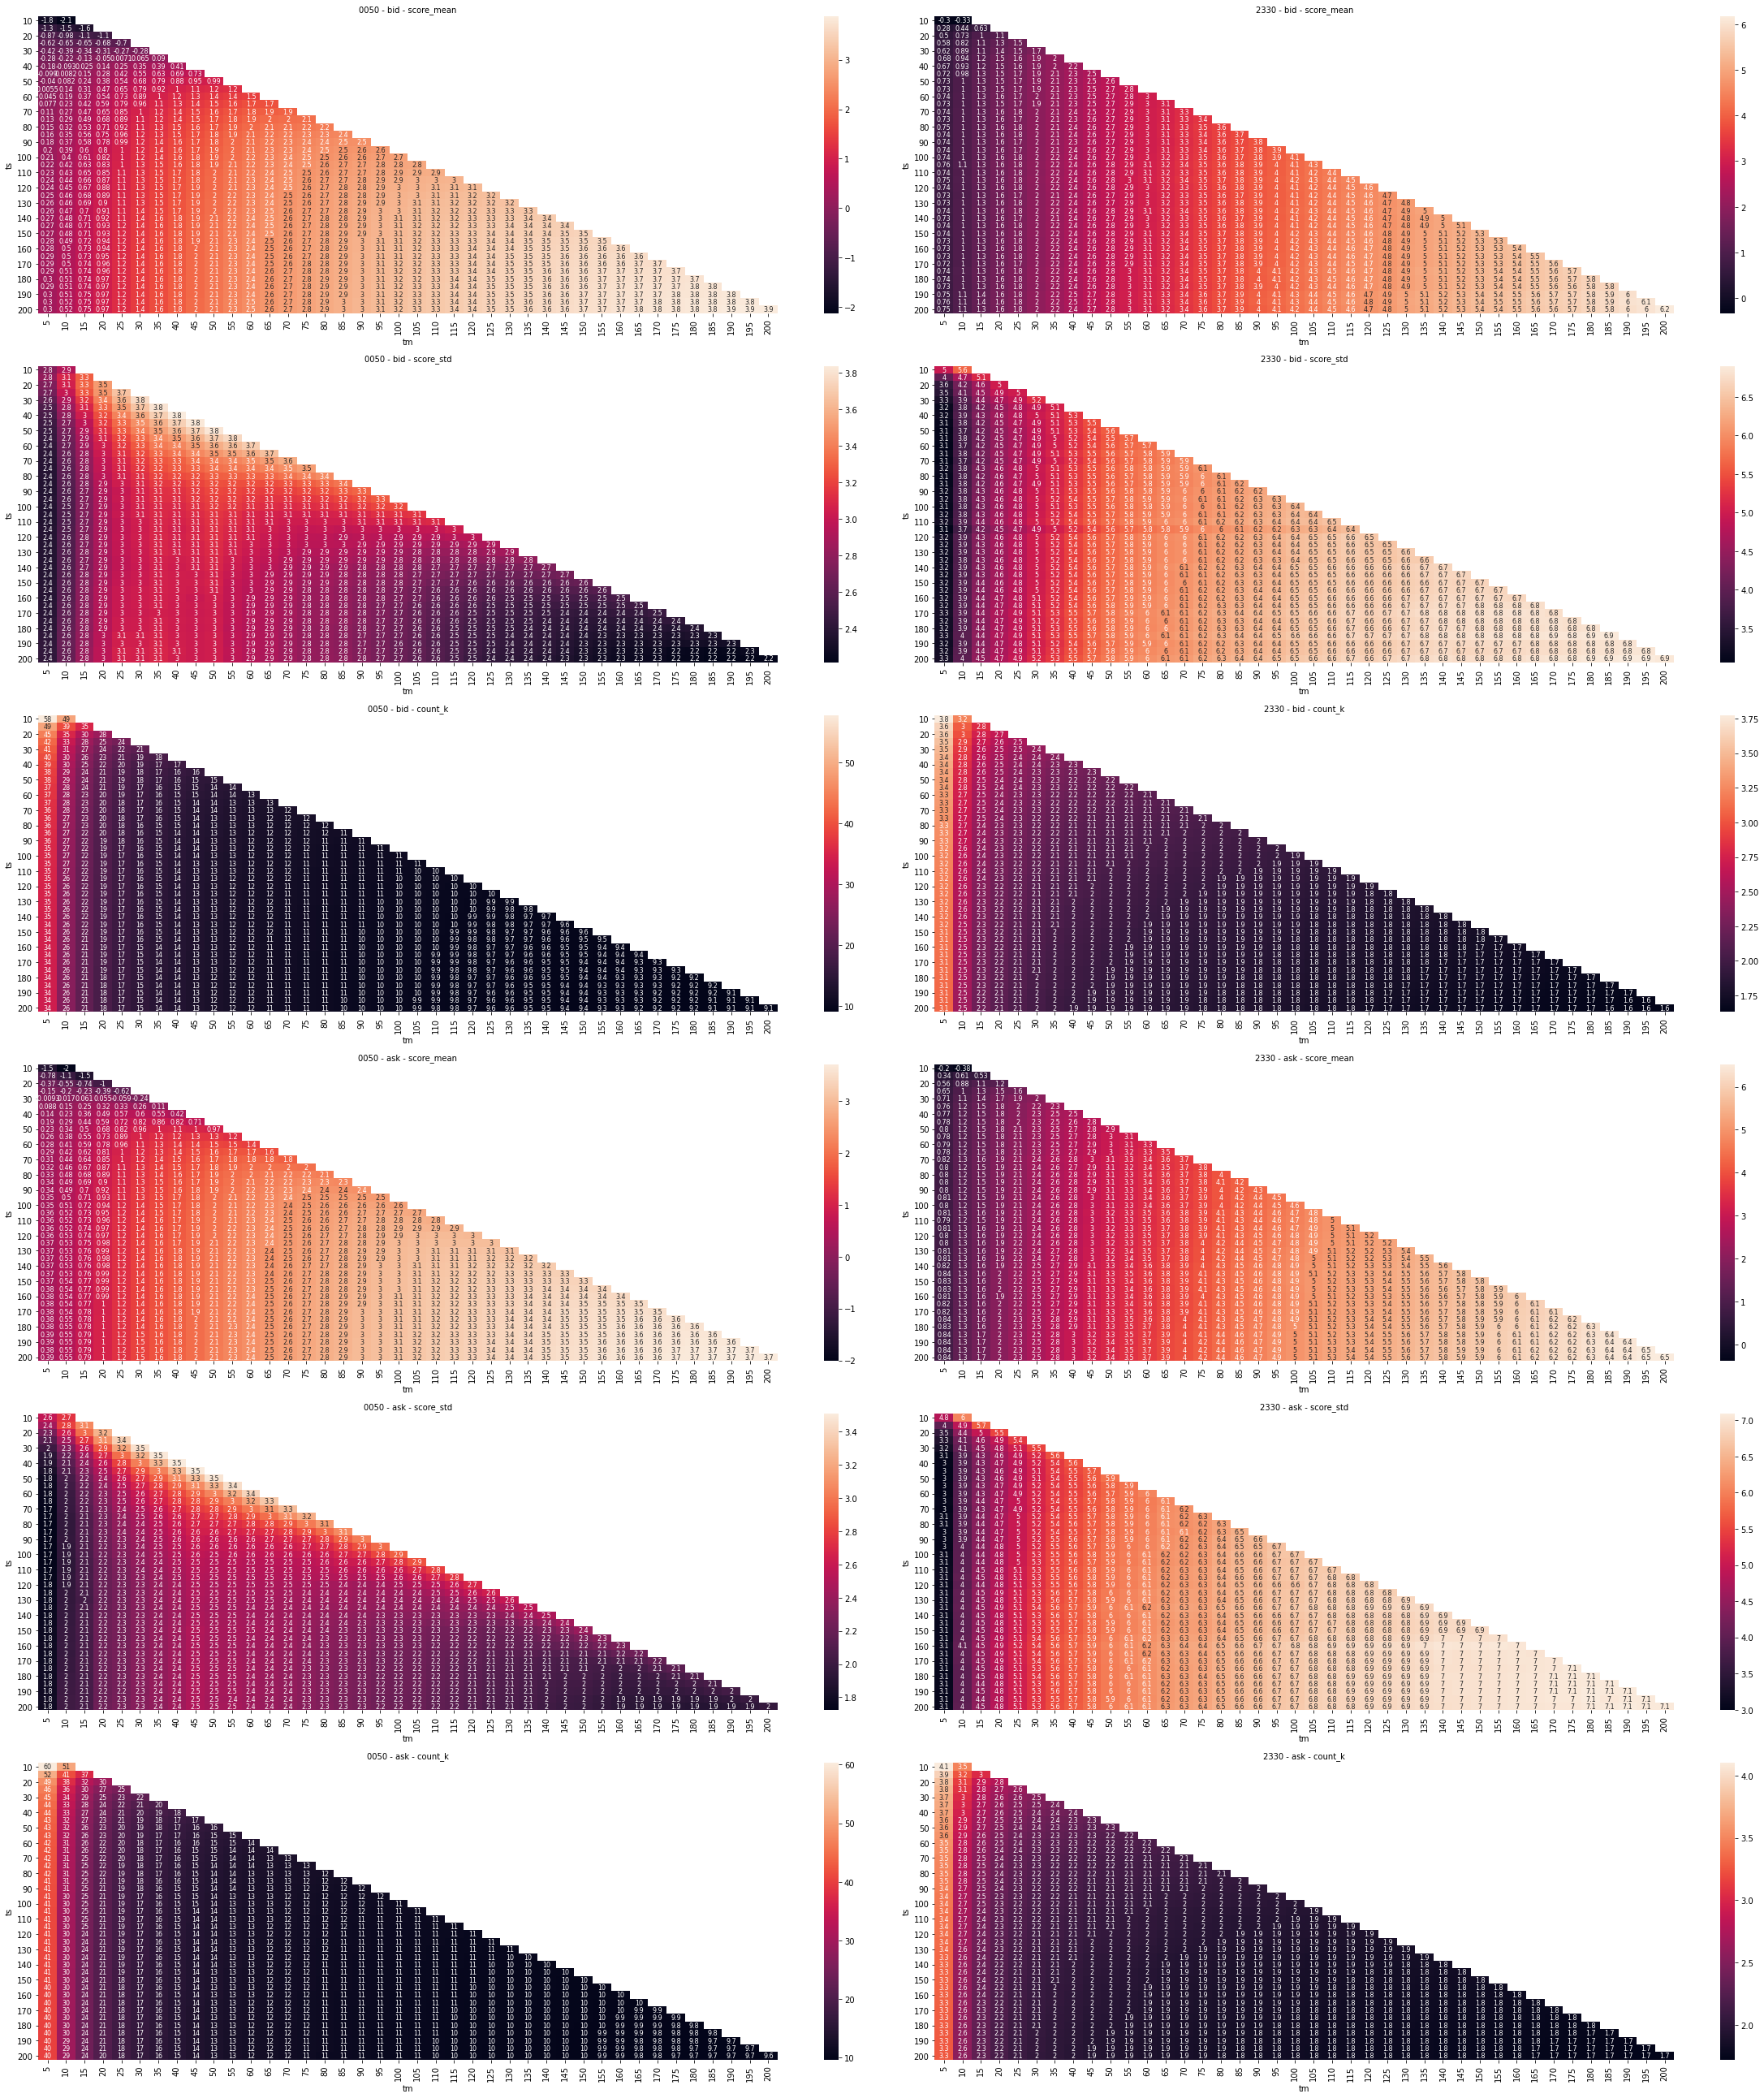

In [4]:
plot_heatmap(stock_code_ls=['0050', '2330'], side_ls=['bid', 'ask'], plot_attri_ls=['score_mean', 'score_std', 'count_k'], res_dict=res_dict)